# **ReelFeel - IMDB Reviews Sentiment Classification Model with Natural Language Processing - using Recurrent Neural Networks**

---

**Alam Rincon - [GitHub: MrRincon](https://github.com/MrRincon)**

**Petar Atanasov - [GitHub: petar-Atanasov](https://github.com/petar-Atanasov)**

**Teon Morgan - [GitHub: Mi1kDev](https://github.com/Mi1kDev)**

---

**Lakshmipathi N. (2019) ‘IMDB Dataset of 50K Movie Reviews’. Available at: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews (Accessed: 14 April 2025).**

# **Preinstalling Libraries**

Run once. Do not run again, and continue.

In [1]:
!pip install gensim

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [2]:
!pip install tensorflow

  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.3 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.1.3 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.1.3 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 2.1.3 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.1.3 which is incompatible.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.1.3 which is incompatible.
streamlit 1.30.0 requires numpy<2,>=1.19.3, but you have numpy 2.1.3 which is incompatible.


# **Preprocessing Data**

Importing core python libraries
*   pandas for dataset manipulation
*   numpy for mathematical processes
*   pyplot and seaborn for data visualization

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nlp_dataset = pd.read_csv("./datasets/IMDB Dataset.csv")
nlp_dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Display general information breakdown of the dataset

In [4]:
# describes basic information regarding the dataset
nlp_dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
# indicates datatyes of the various data columns
nlp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Reviewing the dataset structure for preprocessing.

In [6]:
nlp_dataset.shape

(50000, 2)

In [7]:
# checks for null values in the dataset
nlp_dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
nlp_dataset.isnull().sum().sum()

0

Checking for duplicates and removing them

In [9]:
# checks for duplicate values in the dataset
nlp_dataset.duplicated().sum()

418

In [10]:
# removes existing duplicates
nlp_dataset.drop_duplicates(inplace=True)
nlp_dataset.shape

(49582, 2)

# **Deep Learning Model Implementation**

Importing and downloading all the necessary libraries to tokenise the reviews.

In [11]:
# Regular Expressions Library to Clean the data
import re
# Natural Language Toolkit Library to Preprocess the data
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Downhload the necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alamr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alamr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alamr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Alamr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Alamr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

Function to determine the part-of-speech(POS) tag for each word.

In [12]:
def get_wordnet_pos(word):
  tag = nltk.pos_tag([word])[0][1][0].upper()
  # post_tag access = [Tupple][POS Tag][First Letter POS Tag]
  tag_dict = {
      "J": wordnet.ADJ, # Adjectives
      "N": wordnet.NOUN, # Nouns
      "V": wordnet.VERB, # Verbs
      "R": wordnet.ADV # Adverb
      }
  return tag_dict.get(tag, wordnet.NOUN)

Cleaning the dataset
*   Turning each word to lower case
*   Removing HTML tags
*   Tokenising the words
*   Removing Stopwords
*   Applying lemmatization

In [13]:
# converts review into a token
def preprocess_text(review):
  review = review.lower()
  review = re.sub(r'<[^>]+>', '', review)
  review = re.sub(r'[^a-zA-Z0-9]', ' ', review)
  tokens = word_tokenize(review)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens]

  return " " .join(tokens)

Extracting the tokens of the review and target labels as binary:

In [14]:
nlp_tokenised_reviews = []
nlp_sentiment_labels = []

def extractTokenisedReview(row):
    return preprocess_text(row['review'])
    
def extractSentimentLabels(row):
    if row['sentiment'] == 'positive':
        return 1
    else:
        return 0

nlp_tokenised_reviews = nlp_dataset.apply(extractTokenisedReview, axis=1)
nlp_sentiment_labels = nlp_dataset.apply(extractSentimentLabels, axis=1)

# example of conversion from review to token
print(nlp_tokenised_reviews[:5])
print(nlp_sentiment_labels[:5])

0    one reviewer mention watch 1 oz episode hooked...
1    wonderful little production film technique una...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter mattei love time money visually stun fi...
dtype: object
0    1
1    1
2    1
3    0
4    1
dtype: int64


In [15]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

Function to generate numerical representation (embedding) for a string of tokens from a review.

In [16]:
def get_sentence_embedding(sentence, model, vector_size = 300, max_len = 50):
  tokens = sentence.split()
  # Storing the numerical vectors of the tokens that are valid
  token_vectors = []
  valid_tokens = [token for token in tokens if token in model.key_to_index]
  # Returning a zero vector if no valid tokens are found
  if not valid_tokens:
    return np.zeros(vector_size)
  for token in valid_tokens:
    if token in model.key_to_index:
      token_vectors.append(model[token])
  # Padding to fix the length
  if len(token_vectors) < max_len:
    padding = [np.zeros(vector_size)] * (max_len - len(token_vectors))
    token_vectors.extend(padding)
  else:
    token_vectors = token_vectors[:max_len]

  # Returning the embeddings
  return np.array(token_vectors)

Extracting the embeddings for each review.

In [17]:
nlp_embeddings = []
for review in nlp_tokenised_reviews:
  sentence_embedding = get_sentence_embedding(review, word2vec_model)
  nlp_embeddings.append(sentence_embedding)
#  Converting the embeddings and sentiment binary labels to NumPy array for the ML Model
nlp_embeddings = np.array(nlp_embeddings)
nlp_sentiment_labels = np.array(nlp_sentiment_labels)
print(nlp_embeddings.shape)
print(nlp_sentiment_labels.shape)

(49582, 50, 300)
(49582,)


In [18]:
MAX_LEN = 50
VECTOR_SIZE = 300

## **Recurrent Neural Network (RNN)**

Design and train a neural network, e.g., RNN, LSTM for a text-based task, e.g., sentiment analysis.

Clearly explain the model architecture, e.g., embedding layers, hidden layers, activation functions, and
hyperparameter tuning.

In [19]:
# importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [20]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(nlp_embeddings, nlp_sentiment_labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39665, 50, 300)
(9917, 50, 300)
(39665,)
(9917,)


In [21]:
# impementing RNN model
model = Sequential()
model.add(SimpleRNN(units=256, input_shape=(MAX_LEN, VECTOR_SIZE), return_sequences=False))

# using dropout for regularisation of overfitting
model.add(Dropout(0.6))

# using Rectified Linear Unit which helps vanishing the gradient problem and making the module more efficient
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\Alamr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## **Model Training**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │       142,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,617 (686.00 KB)

 Trainable params: 175,617 (686.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.5059 - loss: 0.7297 - val_accuracy: 0.5521 - val_loss: 0.6870
Epoch 2/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6106 - loss: 0.6507 - val_accuracy: 0.7307 - val_loss: 0.5468
Epoch 3/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7342 - loss: 0.5433 - val_accuracy: 0.7481 - val_loss: 0.5240
Epoch 4/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7576 - loss: 0.5109 - val_accuracy: 0.7643 - val_loss: 0.4982
Epoch 5/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7637 - loss: 0.5010 - val_accuracy: 0.7629 - val_loss: 0.4961
Epoch 6/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7755 - loss: 0.4819 - val_accuracy: 0.7675 - val_loss: 0.4915
Epoch 7/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7792 - loss: 0.4761 - val_accuracy: 0.7706 - val_loss: 0.4839
Epoch 8/100
620/620 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7803 - lo

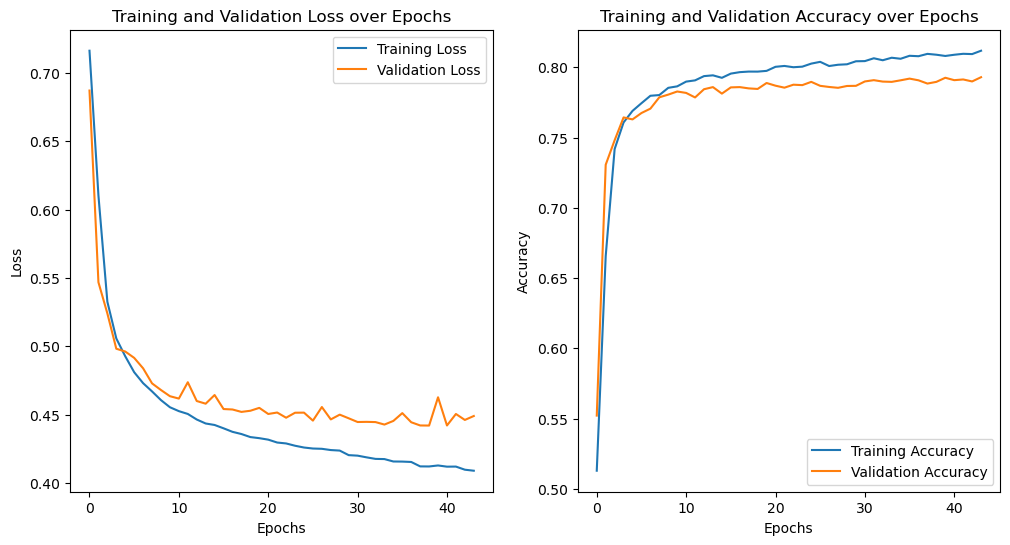

In [22]:
# executing RNN
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.00001), metrics=['accuracy'])
print(model.summary())

# importing earlystopping for preventing training and overfittings if occurs
from tensorflow.keras.callbacks import EarlyStopping
early_Stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# now train the model and add it to the history
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=[early_Stopping])


# plot the trained history for visualisation
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.show()

# **Evaluation and Insights**